In [26]:
#Manipulacao dos dados
import numpy as np
import pandas as pd

#divisao dos dados
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay #avaliacao
import matplotlib.pyplot as plt #visualizacao
from sklearn.tree import DecisionTreeClassifier #algoritmo de classificacao

import warnings
warnings.filterwarnings('ignore')
     

In [27]:
#https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
dataset = pd.read_csv('https://raw.githubusercontent.com/cynthiamaia/Monitoria-DeepLearning-CIN-AI/main/Datasets/Breast%20Cancer%20Wisconsin%20(Diagnostic).csv')
dataset

,diagnosis,radius_Mean,texture_Mean,periMeter_Mean,area_Mean,sMoothness_Mean,coMpactness_Mean,concavity_Mean,concave points_Mean,syMMetry_Mean,...,radius_worst,texture_worst,periMeter_worst,area_worst,sMoothness_worst,coMpactness_worst,concavity_worst,concave points_worst,syMMetry_worst,fractal_diMension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
print(f"Tamanho do dataset: {dataset.shape}\n")
dataset.head()

Tamanho do dataset: (569, 31)



,diagnosis,radius_Mean,texture_Mean,periMeter_Mean,area_Mean,sMoothness_Mean,coMpactness_Mean,concavity_Mean,concave points_Mean,syMMetry_Mean,...,radius_worst,texture_worst,periMeter_worst,area_worst,sMoothness_worst,coMpactness_worst,concavity_worst,concave points_worst,syMMetry_worst,fractal_diMension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = dataset.drop(columns=["diagnosis"], axis = 1) #Diagnosis -> Target
y = dataset["diagnosis"]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Random_state: Usar um valor inteiro produzirá os mesmos resultados em diferentes chamadas.

In [15]:
model = DecisionTreeClassifier(random_state=199)
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred)) #Existem várias formas de avaliar um modelo de aprendizagem, dependendo da tarefa que o modelo irá realizar.

"""Acurácia: Calcula a razão das predições corretas.
Precisão: Mede a capacidade do classificador de não classificar uma instância positiva como negativa.
Revocação (recall): Mede a capacidade do classificador de encontrar todas as instâncias positivas.
Score F1: É a média harmônica entre precisão e revocação. Caso você não tenha um objetivo concreto que dê prioridade a precisão ou revocação, F1 é uma boa forma de avaliação.
"""     

              precision    recall  f1-score   support

           B       0.98      0.97      0.97        96
           M       0.94      0.96      0.95        47

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



'Acurácia: Calcula a razão das predições corretas.\nPrecisão: Mede a capacidade do classificador de não classificar uma instância positiva como negativa.\nRevocação (recall): Mede a capacidade do classificador de encontrar todas as instâncias positivas.\nScore F1: É a média harmônica entre precisão e revocação. Caso você não tenha um objetivo concreto que dê prioridade a precisão ou revocação, F1 é uma boa forma de avaliação.\n'


#### Matriz de confusão
##### a função confusion matrix retorna uma matriz com a contagem de como cada  uma das classes está sendo classificada corretamente ou erroneamente

In [7]:
confusion_matrix(y_test, y_pred)


array([[86,  5],
       [ 2, 50]])

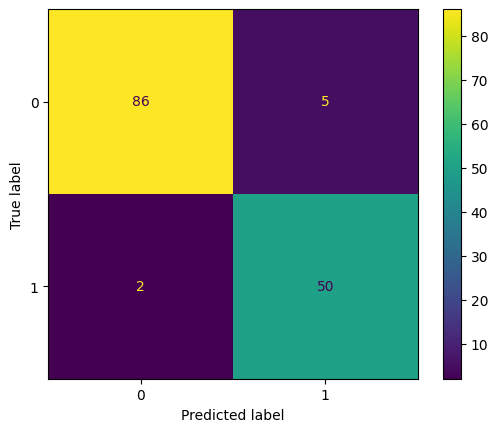

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

ROC: 
# Mede o trade-off entre a taxa de falsos positivos e a taxa de verdadeiros positivos. Quanto maior a área abaixo da curva, melhor o classificador.

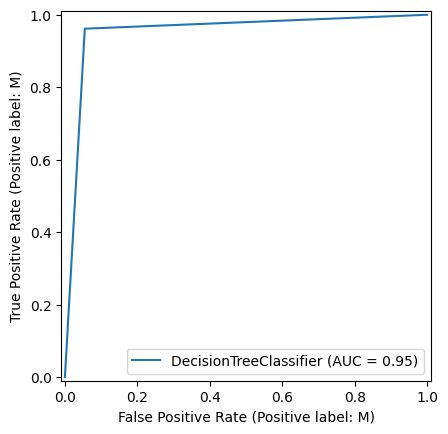

In [9]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

#### HOLD-OUT
##### Uma pequena fração do dataset é separada para teste e outra para treino. A fração de treino pode ser dividida subsequentemente em quaisquer outros subconjuntos, o importante é garantir que o dataset de teste não é utilizado durante treino, otimização ou concepção do modelo.

In [18]:
def test_model(X_train, X_test, y_train, y_test, model_class=DecisionTreeClassifier):
    model = model_class(random_state=199)
    model.fit(X_train, y_train)

    #predição
    y_pred = model.predict(X_test)
        
    return accuracy_score(y_test,y_pred)

random_states = [199, 200, 201, 202]

for rs in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rs)
    print(f"Random state {rs}: {test_model(X_train, X_test, y_train, y_test)}")

# Aleatório
print("\nAleatório:")
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(f"Sem random_state: {test_model(X_train, X_test, y_train, y_test)}")


Random state 199: 0.916083916083916
Random state 200: 0.9370629370629371
Random state 201: 0.9370629370629371
Random state 202: 0.9440559440559441

Aleatório:
Sem random_state: 0.9300699300699301


In [ ]:
def hold_out():
  accuracies_list = []
  for i in range(0, 30):
      X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=199+i) #variando o random state para criar amostras diferentes
      accuracies_list.append(test_model(X_train, X_test, y_train, y_test))

  accuracies = np.array(accuracies_list)
  print("Min: %.3f Max: %.3f" %(accuracies.min(), accuracies.max()))
  print("Hold-out: %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))

hold_out()
 
#Podemos adicionar repetição e realizar vários hold-outs para avaliar várias vezes a performance de um algoritmo.
    

Min: 0.888 Max: 0.951
Hold-out: 0.921 +- (0.021)


#### LEAVE-ONE-OUT
##### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html
##### Fornece índices de treinamento/teste para dividir os dados em conjuntos de treinamento/teste.
##### Cada amostra é usada uma vez como um conjunto de teste (singleton) enquanto as amostras restantes formam o conjunto de treinamento.

In [12]:
def loo(loo):
    y_true, y_pred = list(), list()
    for train_index, test_index in loo.split(X):
          X_train, X_test = X.iloc[train_index], X.iloc[test_index]
          y_train, y_test = y.iloc[train_index], y.iloc[test_index]
          model = DecisionTreeClassifier(random_state=199)
          model.fit(X_train, y_train)
          pred = model.predict(X_test)
          y_true.append(y_test)
          y_pred.append(pred[0])
          
    print("Leave-One-Out: %.3f" %(accuracy_score(y_true, y_pred)))
loo(LeaveOneOut())

Leave-One-Out: 0.924


KFOLD
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# Fornece índices de treinamento/teste para dividir dados em conjuntos de treinamento/teste. Divide o conjunto de dados em k folds consecutivos (sem embaralhar "shuffle" por padrão)

In [13]:
def evaluate_model(kf):
    accuracies_list = []
    fold = 0
    for train, test in kf.split(X, y):
        
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        model = DecisionTreeClassifier(random_state=199)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        print("Fold %d: %.3f" %(fold, accuracy_score(y_test, y_pred)))
        
        accuracies_list.append(accuracy_score(y_test, y_pred))
        fold += 1

    accuracies = np.array(accuracies_list)
    print("\nAcurácia média (desvio): %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))

evaluate_model(KFold(n_splits=5, random_state=42, shuffle=True))
     

Fold 0: 0.947
Fold 1: 0.930
Fold 2: 0.895
Fold 3: 0.947
Fold 4: 0.947

Acurácia média (desvio): 0.933 +- (0.020)


#### GRID SEARCH CV
##### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
##### O Grid-search é usado para encontrar os hiperparâmetros ideais de um modelo que resultem em previsões mais "precisas".

In [14]:
def grid_Search(skf):
  accuracies_list = []
  fold = 0

  for train, test in skf.split(X, y):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        model = DecisionTreeClassifier(random_state=199)
        parameters = {'min_samples_split': [10, 30],
                        'max_depth':[5, 30],
                        'max_features':[10, 30]
                        }
    
        grid = GridSearchCV(estimator = model,             # É o DecisionTree
                    param_grid = parameters,           # É aquele dicionário com valores para serem testados.
                    scoring = 'accuracy',              # A métrica de avaliação
                    cv = 5)
        
        grid.fit(X_train, y_train)

        y_pred = grid.predict(X_test)
    
        print("Melhor parametro:", grid.best_params_)         
        print("Fold %d: %.3f" %(fold, accuracy_score(y_test, y_pred)))
        
        accuracies_list.append(accuracy_score(y_test, y_pred))
        fold += 1
    
    
  accuracies = np.array(accuracies_list)
  print("\nAcurácia média (desvio): %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))
  return pd.DataFrame(grid.cv_results_)

grid_Search(StratifiedKFold(n_splits=5, random_state=42, shuffle=True))

Melhor parametro: {'max_depth': 30, 'max_features': 10, 'min_samples_split': 10}
Fold 0: 0.921
Melhor parametro: {'max_depth': 5, 'max_features': 10, 'min_samples_split': 10}
Fold 1: 0.912
Melhor parametro: {'max_depth': 5, 'max_features': 10, 'min_samples_split': 30}
Fold 2: 0.921
Melhor parametro: {'max_depth': 30, 'max_features': 10, 'min_samples_split': 10}
Fold 3: 0.939
Melhor parametro: {'max_depth': 5, 'max_features': 30, 'min_samples_split': 10}
Fold 4: 0.938

Acurácia média (desvio): 0.926 +- (0.010)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001759,0.000080,0.000533,0.000020,5,10,10,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.923913,0.890110,0.868132,0.923077,0.967033,0.914453,0.033665,4
1,0.001578,0.000013,0.000516,0.000017,5,10,30,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.902174,0.879121,0.901099,0.923077,0.967033,0.914501,0.029720,3
2,0.003509,0.000350,0.000562,0.000063,5,30,10,"{'max_depth': 5, 'max_features': 30, 'min_samp...",0.923913,0.901099,0.956044,0.945055,0.912088,0.927640,0.020348,1
3,0.003499,0.000340,0.000572,0.000090,5,30,30,"{'max_depth': 5, 'max_features': 30, 'min_samp...",0.891304,0.901099,0.901099,0.945055,0.923077,0.912327,0.019395,5
4,0.001788,0.000057,0.000549,0.000074,30,10,10,"{'max_depth': 30, 'max_features': 10, 'min_sam...",0.869565,0.890110,0.901099,0.923077,0.956044,0.907979,0.029599,7
5,0.001794,0.000070,0.000525,0.000043,30,10,30,"{'max_depth': 30, 'max_features': 10, 'min_sam...",0.923913,0.868132,0.868132,0.901099,0.967033,0.905662,0.037249,8
6,0.003782,0.000532,0.000554,0.000057,30,30,10,"{'max_depth': 30, 'max_features': 30, 'min_sam...",0.913043,0.901099,0.956044,0.923077,0.912088,0.921070,0.018821,2
7,0.003734,0.000551,0.000543,0.000054,30,30,30,"{'max_depth': 30, 'max_features': 30, 'min_sam...",0.891304,0.901099,0.901099,0.945055,0.923077,0.912327,0.019395,5
